# Impact of central bank interest rate decisions on inflation rates and markets
Project by: *Timo Gumpp*
Course: *Machine Learning for Portfolio Trading*
University: *ENSAE Paris*

### Objective of this project

1. Observe how accompanying press statements regarding decisions of interest rate changes differ (length, sentiment, sophistication, etc.)
2. Observe correlation of different press releases characteristics on the result of the interest change hike
3. Observe impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on inflation development
4. (Optionally, out of interest): Observe potential impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on capital markets (e.g., using the example of S&P 500 index)

#### What to use AI tools for when coding this project
I use Copilot for inline suggestions. As I type, Copilot takes care of the little things. It saves me from dozens of searches every day.

ChatGPT is the workhorse. I use it to solve more complex tasks with my code. Here are some examples:

• Explain what this code does
• Simplify it
• Rewrite it in a more efficient way
• Rewrite it in a more readable way
• Replace the use of a library with another
• Write documentation for it
• Describe potential edge cases
• Write unit tests for those edge cases

I use Perplexity to ask questions. Google is broken. If you don't believe me, try Perplexity for a day.


### Running **ToDos** of the project:
- Add ECB web scraping
- Add further sentiment analysis models
- Use Vectorizing (e.g., TFIDF, etc.)
- Add interest rate hikes
- Generally add comparisons between EU and US
- Solve import issue with US inflation data (CPI) --> 'Available on Feb. 14'

## Loading Packages

**NB!:** For some operations, we might need to **download some nltk-packages**, e.g. the "stopwords" package (e.g., ```nltk.download('stopwords')```)
Also, sometimes the **installation of new packages** might be in order (e.g., ```pip install nltk textblob```)

In [168]:
import pandas as pd
import matplotlib
import nltk
#import spacy
from IPython.display import IFrame
import os
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

## Load in text

#### What to look at

I limit the project on the ECB and the FED, thus looking into inflation in the Eurozone and the US respectively.

***
- The ECB's council takes interest rate decisions x times a year and each time releases press statements.
- The Federal Open Market Commitee (FOMC – the FED's council on moneytary policy decisions) holds regularly scheduled meetings 8 times a year and other meetings as needed. Each time a press statement is released. Every second meeting, this seems to be accompanied by a summary of economic projections.

The released statements include xx

An **example for a press statement** from both the ECB and the FED can be accessed under the these links: __[ECB_Dec23](https://www.ecb.europa.eu/press/pressconf/shared/pdf/ecb.ds231214~cbcff0882a.en.pdf)__ or __[FOMC_Dec23](https://www.federalreserve.gov/monetarypolicy/files/monetary20231213a1.pdf)__

We primarily focus on the developments from 2022 to 2023, and will potentally look into developments in 2020 and 2021. The year 2024 is left out of our analysis.
The also release minutes, which we're not using in our analysis

The FOMC's press releases compose themselves of a press statement and an implementation note, highlighting which monetary measures are being taken.

#### Web Mining FOMC

Extraction of text is automated, the supply of the corresponding URLs not for now

In [2]:
fomc_statements_url_list = ['https://www.federalreserve.gov/newsevents/pressreleases/monetary20230201a.htm', # 2023
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230322a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230503a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230614a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230726a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230920a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231213a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220126a.htm', # 2022
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220316a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220504a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220615a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220727a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220921a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20221102a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20221214a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210127a.htm', # 2021
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210317a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210428a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210616a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210728a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210922a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211103a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211215a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200129a.htm', # 2020
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200303a.htm', # unscheduled
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200315a.htm', # unscheduled
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200323a.htm', # notation vote
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200429a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200610a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200729a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200916a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201105a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201216a.htm'
                            ]

In [3]:
# TODO: add if / else if mining fails
def process_text(text):
    list = [title.text.strip() for title in text]
    text_final = ' '.join(map(str, list))
    return text_final

def process_date(date):
    raw_date = date.get_text(strip=True)
    #print("Raw Date:", raw_date)

    # Transform the date format
    datetime_object = datetime.strptime(raw_date, '%B %d, %Y')
    formatted_date = datetime_object.strftime('%d.%m.%Y')
    return pd.to_datetime(formatted_date, format='%d.%m.%Y')

def process_url(url):
    return url.split('/')[-1].split('.')[0]

In [48]:
df_fomc_press_statements = pd.DataFrame(columns = {"Filename", "Date", "Text"})

for x in fomc_statements_url_list:
    page = requests.get(x)
    soup = BeautifulSoup(page.text, 'html')

    target_text = soup.find('div', class_='col-xs-12 col-sm-8 col-md-8')
    target_date = soup.find('p', class_='article__time')
    target_url = soup.find('meta', property='og:url').get('content')

    # run processing and add processed to df
    df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

In [49]:
#df_fomc_press_statements['Date'] = pd.to_datetime(df_fomc_press_statements['Date'], format='%d.%m.%Y')
df_fomc_press_statements

,Date,Filename,Text
0,2023-02-01 00:00:00,monetary20230201a,Recent indicators point to modest growth in s...
1,2023-03-22 00:00:00,monetary20230322a,Recent indicators point to modest growth in s...
2,2023-05-03 00:00:00,monetary20230503a,Economic activity expanded at a modest pace i...
3,2023-06-14 00:00:00,monetary20230614a,Recent indicators suggest that economic activ...
4,2023-07-26 00:00:00,monetary20230726a,Recent indicators suggest that economic activ...
5,2023-09-20 00:00:00,monetary20230920a,Recent indicators suggest that economic activ...
6,2023-11-01 00:00:00,monetary20231101a,Recent indicators suggest that economic activ...
7,2023-12-13 00:00:00,monetary20231213a,Recent indicators suggest that growth of econ...
8,2022-01-26 00:00:00,monetary20220126a,Indicators of economic activity and employmen...
9,2022-03-16 00:00:00,monetary20220316a,Indicators of economic activity and employmen...


#### Web Mining ECB press releases

In [300]:
ecb_statements_url_list = ['https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp231214~9846e62f62.en.html', # 2023
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp231026~6028cea576.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230914~aab39f8c21.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230727~da80cfcf24.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230615~d34cddb4c6.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230504~cdfd11a697.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230316~aad5249f30.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.mp230202~08a972ac76.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp221215~f3461d7b6e.en.html', # 2022
                            'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp221027~df1d778b84.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220908~c1b6839378.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220721~53e5bdd317.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220609~122666c272.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220414~d1b76520c6.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220310~2d19f8ba60.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2022/html/ecb.mp220203~90fbe94662.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp211216~1b6d3a1fd8.en.html', # 2021
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp211028~85474438a4.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210909~2c94b35639.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210722~48dc3b436b.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210610~b4d5381df0.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210422~f075ebe1f0.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210311~35ba71f535.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2021/html/ecb.mp210121~eb9154682e.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp201210~8c2778b843.en.html', # 2020
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp201029~4392a355f4.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200910~f4a8da495e.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200716~fc5fbe06d9.en.html', # The page formatting changes, hence for the last 5 statements, the scraping would need to be adjusted
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200604~a307d3429c.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200430~1eaa128265.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200312~8d3aec3ff2.en.html',
                           'https://www.ecb.europa.eu/press/pr/date/2020/html/ecb.mp200123~ae33d37f6e.en.html']


In [301]:
def extract_text_after_pattern(input_text):
    # Define the pattern for the number starting with '2'
    pattern = r'\b2\d{3}\b'

    # Find the match using regular expression
    match = re.search(pattern, input_text)

    if match:
        # Extract the text after the matched pattern
        result_text = input_text[match.end():].strip()
        return result_text
    else:
        # If no match found, return an empty string
        return ""

def remove_html_tags(input_text):
    # Define the pattern for HTML-like tags
    html_tag_pattern = re.compile(r'<\/?[^>]+>')

    # Remove HTML-like tags from the input text
    cleaned_text = re.sub(html_tag_pattern, '', input_text)

    return cleaned_text

def extract_paragraphs_until_h2(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    paragraphs = []

    for element in soup.find_all(['p', 'h2']):
        if element.name == 'h2':
            break
        paragraphs.append(str(element))

    result_text = ''.join(paragraphs)
    return result_text

In [302]:
df_ecb_press_statements = pd.DataFrame(columns = {"Date", "Text"})

for x in ecb_statements_url_list:
    page = requests.get(x)
    soup = BeautifulSoup(page.text, 'html')

    text = soup.find('main')
    if text is not None:

        target_text = remove_html_tags(extract_paragraphs_until_h2(extract_text_after_pattern(str(text.find('div', class_='section')))))

    target_date = soup.find('p', class_='ecb-publicationDate')

    # run processing and add processed to df
    df_ecb_press_statements = df_ecb_press_statements.append({'Date': remove_html_tags(str(target_date)), 'Text': target_text}, ignore_index=True)

df_ecb_press_statements.head()

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/2716897008.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecb_press_statements = df_ecb_press_statements.append({'Date': remove_html_tags(str(target_date)), 'Text': target_text}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/2716897008.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecb_press_statements = df_ecb_press_statements.append({'Date': remove_html_tags(str(target_date)), 'Text': target_text}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/2716897008.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ecb_press_statements = df_ecb_press_statements.append({'D

,Date,Text
0,14 December 2023,The Governing Council today decided to keep th...
1,26 October 2023,The Governing Council today decided to keep th...
2,14 September 2023,Inflation continues to decline but is still ex...
3,27 July 2023,Inflation continues to decline but is still ex...
4,15 June 2023,Inflation has been coming down but is projecte...


In [303]:
df_ecb_press_statements = df_ecb_press_statements.head(27)
df_ecb_press_statements['Date'] = df_ecb_press_statements['Date'].apply(lambda x: datetime.strptime(x.strip(), '%d %B %Y'))
df_ecb_press_statements

,Date,Text
0,2023-12-14,The Governing Council today decided to keep th...
1,2023-10-26,The Governing Council today decided to keep th...
2,2023-09-14,Inflation continues to decline but is still ex...
3,2023-07-27,Inflation continues to decline but is still ex...
4,2023-06-15,Inflation has been coming down but is projecte...
5,2023-05-04,The inflation outlook continues to be too high...
6,2023-03-16,Inflation is projected to remain too high for ...
7,2023-02-02,The Governing Council will stay the course in ...
8,2022-12-15,The Governing Council today decided to raise t...
9,2022-10-27,The Governing Council today decided to raise t...


## Load Interest rate decisions
We want to know
- the dates of interest rate decisions,
- the amount of change (rate hike),
- and the overall interest rate

Interest rate in our context refers to the main interest rate, which is specified for the FED and the ECB.

We look into the timeframe from shortly before Covid (Late 2019) until end of 2023.

### Load FED interest rates
The FED has two main interest rates.
- Federal Funds Rate
- Primary Credit Rate

When talking about "the" interest rate of the FED, the talk is about the Federal Funds Rate. Our work is thus focusing on it as well.

Data can be obtained from multiple sources, e.g. from here: https://www.bankrate.com/banking/federal-reserve/history-of-federal-funds-rate/

In [304]:
# Provided table data manually extracted from data source, as cost / reward ratio was favorable for manual extraction for so little datapoints
table_data = {
    'Date': ['Jul. 30, 2019', 'Sep. 17, 2019', 'Oct. 29, 2019', 'Mar. 3, 2020', 'Mar. 14, 2020', 'Mar. 15, 2022', 'May. 3, 2022', 'Jun. 14, 2022', 'Jul. 26, 2022',
                     'Sep. 20, 2022', 'Nov. 1, 2022', 'Dec. 13, 2022', 'Jan. 31, 2023',
                     'Mar. 21, 2023', 'May. 2, 2023', 'Jul. 25, 2023'],
    'Rate Hike': [-0.25,-0.25,-0.25,-0.5,-1,0.25, 0.5, 0.75, 0.75, 0.75, 0.75, 0.5, 0.25, 0.25, 0.25, 0.25],
    'Interest Rate (FFR)': [2, 1.75, 1.5, 1, 0, 0.25, 0.75, 1.5, 2.25, 3, 3.75, 4.25, 4.5, 4.75, 5, 5.25]
}

# Creating a DataFrame from the provided table data
df_fed_interest_rates = pd.DataFrame(table_data)

# Converting 'Meeting date' to datetime format and simplifying to single date
df_fed_interest_rates['Date'] = df_fed_interest_rates['Date'].apply(lambda x: datetime.strptime(x.split('-')[0].strip(), '%b. %d, %Y'))

df_fed_interest_rates

,Date,Rate Hike,Interest Rate (FFR)
0,2019-07-30,-0.25,2.00
1,2019-09-17,-0.25,1.75
2,2019-10-29,-0.25,1.50
3,2020-03-03,-0.50,1.00
4,2020-03-14,-1.00,0.00
5,2022-03-15,0.25,0.25
6,2022-05-03,0.50,0.75
7,2022-06-14,0.75,1.50
8,2022-07-26,0.75,2.25
9,2022-09-20,0.75,3.00


In [305]:
df_fed_interest_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 16 non-null     datetime64[ns]
 1   Rate Hike            16 non-null     float64       
 2   Interest Rate (FFR)  16 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 512.0 bytes


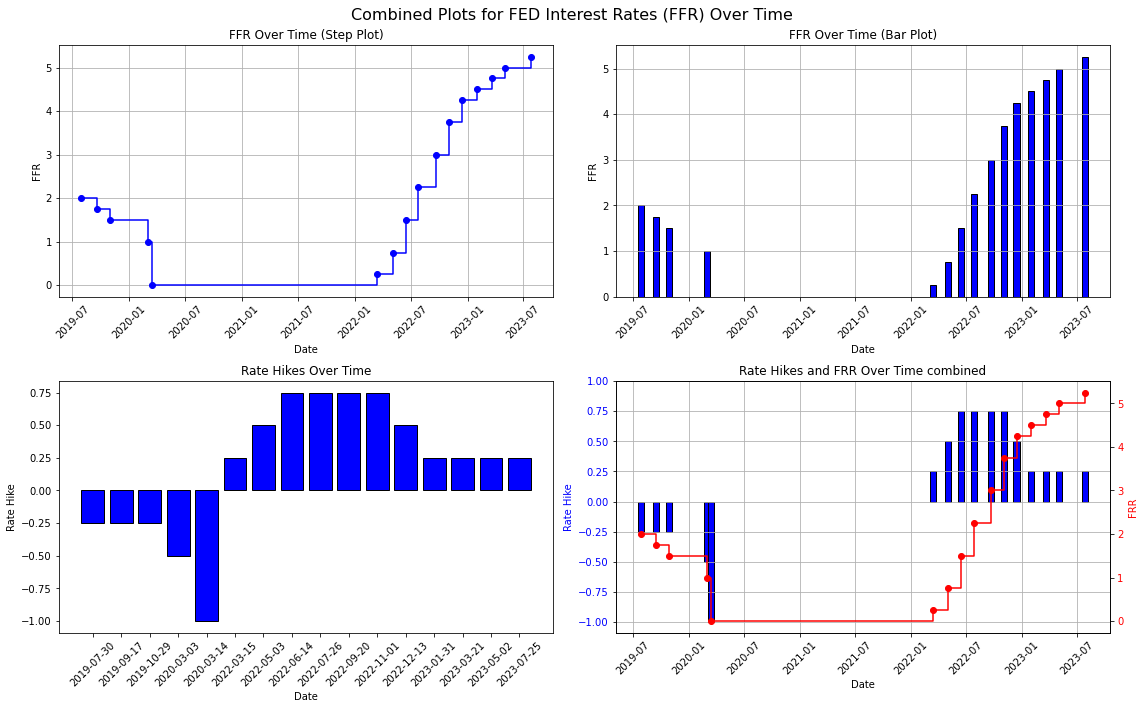

In [306]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plotting the step plot in the first subplot (combined with bar plot)
axs[0, 0].step(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], where='post', marker='o', color='b')
axs[0, 0].set_title('FFR Over Time (Step Plot)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('FFR')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plotting the bar plot in the second subplot (combined with step plot)
axs[0, 1].bar(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], width=20, color='b', edgecolor='black')
axs[0, 1].set_title('FFR Over Time (Bar Plot)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('FFR')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plotting the bar plot in the third subplot
axs[1, 0].bar(df_fed_interest_rates['Date'].astype(str), df_fed_interest_rates['Rate Hike'], width=0.8, color='b', edgecolor='black')
axs[1, 0].set_title('Rate Hikes Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Rate Hike')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plotting the combined plot with two y-axes in the third subplot
ax3 = axs[1, 1]
ax3.bar(df_fed_interest_rates['Date'], df_fed_interest_rates['Rate Hike'], width=20, color='b', edgecolor='black')
ax3.set_xlabel('Date')
ax3.set_ylabel('Rate Hike', color='b')
ax3.set_title('Rate Hikes and FRR Over Time combined')
ax3.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='y', labelcolor='b')
ax3.set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax3.grid(True)

# Create a twin Axes sharing the xaxis for Rate Hike
ax4 = ax3.twinx()
ax4.set_ylabel('FRR', color='r')
ax4.step(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], color='r', where='post', marker='o')
ax4.tick_params(axis='y', labelcolor='r')

fig.suptitle('Combined Plots for FED Interest Rates (FFR) Over Time', fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

### Load ECB interest rates

The ECB has three interest rates.

- The interest rate on the main refinancing operations (MRO), which provide the bulk of liquidity to the banking system.
- The rate on the deposit facility, which banks may use to make overnight deposits with the Eurosystem.
- The rate on the marginal lending facility, which offers overnight credit to banks from the Eurosystem.

When talking about "the" interest rate of the ECB, the talk is about the MRO. Our work is thus focusing on it as well.

Source: [ECB Interest Rates](https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html)

In [307]:
# URL of the website
url = "https://www.ecb.europa.eu/stats/policy_and_exchange_rates/key_ecb_interest_rates/html/index.en.html"

# Read HTML tables from the URL
tables = pd.read_html(url)

# Assuming the table of interest is the first one on the page
df_ecb_interest_rates = tables[0]
# Rename all columns to a, b, c, etc.
df_ecb_interest_rates.columns = list('abcdef')[:len(df_ecb_interest_rates.columns)]
#df_ecb_interest_rates['a'] = df_ecb_interest_rates['a'].astype(int)
#df_ecb_interest_rates = df_ecb_interest_rates[df_ecb_interest_rates['a'] >= 2019]

# Display the DataFrame
df_ecb_interest_rates = df_ecb_interest_rates.head(11) # Only the most recent (e.g., 11) rate changes are of interest. Others are older than 2016.

# Transforming DataFrame
# Combine 'Year' and 'MonthDay' columns into a new 'Date' column
df_ecb_interest_rates['Date'] = pd.to_datetime(df_ecb_interest_rates['a'] + ' ' + df_ecb_interest_rates['b'].astype(str).str.rstrip('.'), format='%Y %d %b')

# Drop the original 'Year' and 'MonthDay' columns
df_ecb_interest_rates = df_ecb_interest_rates.drop(['a', 'b', 'c', 'e', 'f'], axis=1)
df_ecb_interest_rates = df_ecb_interest_rates.rename(columns={'d': 'MRO',})
df_ecb_interest_rates['MRO'] = df_ecb_interest_rates['MRO'].astype(float)
df_ecb_interest_rates = df_ecb_interest_rates.sort_values(by='Date')

# Reset the index after sorting
df_ecb_interest_rates = df_ecb_interest_rates.reset_index(drop=True)
df_ecb_interest_rates['Rate Hike'] = df_ecb_interest_rates['MRO'].diff().fillna(0)
df_ecb_interest_rates

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/1974140635.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecb_interest_rates['Date'] = pd.to_datetime(df_ecb_interest_rates['a'] + ' ' + df_ecb_interest_rates['b'].astype(str).str.rstrip('.'), format='%Y %d %b')


,MRO,Date,Rate Hike
0,0.00,2019-09-18,0.00
1,0.50,2022-07-27,0.50
2,1.25,2022-09-14,0.75
3,2.00,2022-11-02,0.75
4,2.50,2022-12-21,0.50
5,3.00,2023-02-08,0.50
6,3.50,2023-03-22,0.50
7,3.75,2023-05-10,0.25
8,4.00,2023-06-21,0.25
9,4.25,2023-08-02,0.25


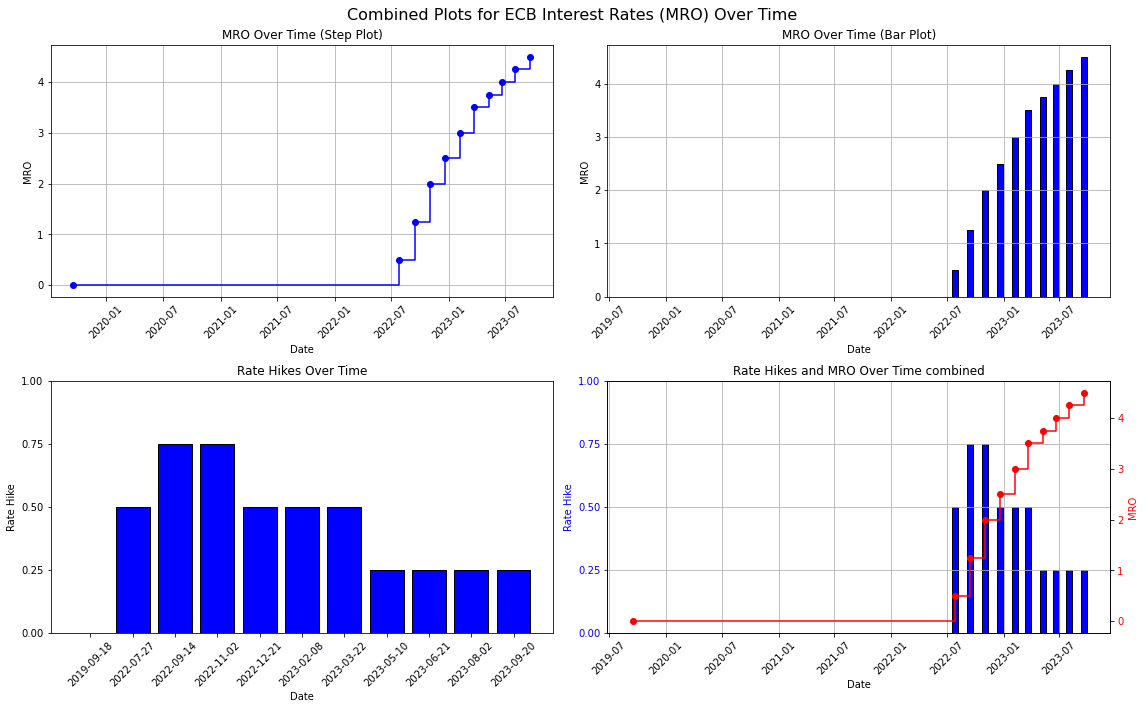

In [308]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plotting the step plot in the first subplot (combined with bar plot)
axs[0, 0].step(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], where='post', marker='o', color='b')
axs[0, 0].set_title('MRO Over Time (Step Plot)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('MRO')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plotting the bar plot in the second subplot (combined with step plot)
axs[0, 1].bar(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], width=20, color='b', edgecolor='black')
axs[0, 1].set_title('MRO Over Time (Bar Plot)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('MRO')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plotting the bar plot in the third subplot
axs[1, 0].bar(df_ecb_interest_rates['Date'].astype(str), df_ecb_interest_rates['Rate Hike'], width=0.8, color='b', edgecolor='black')
axs[1, 0].set_title('Rate Hikes Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Rate Hike')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_yticks([0, 0.25, 0.5, 0.75, 1])

# Plotting the combined plot with two y-axes in the third subplot
ax3 = axs[1, 1]
ax3.bar(df_ecb_interest_rates['Date'], df_ecb_interest_rates['Rate Hike'], width=20, color='b', edgecolor='black')
ax3.set_xlabel('Date')
ax3.set_ylabel('Rate Hike', color='b')
ax3.set_title('Rate Hikes and MRO Over Time combined')
ax3.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='y', labelcolor='b')
ax3.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax3.grid(True)

# Create a twin Axes sharing the xaxis for Rate Hike
ax4 = ax3.twinx()
ax4.set_ylabel('MRO', color='r')
ax4.step(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], color='r', where='post', marker='o')
ax4.tick_params(axis='y', labelcolor='r')

fig.suptitle('Combined Plots for ECB Interest Rates (MRO) Over Time', fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

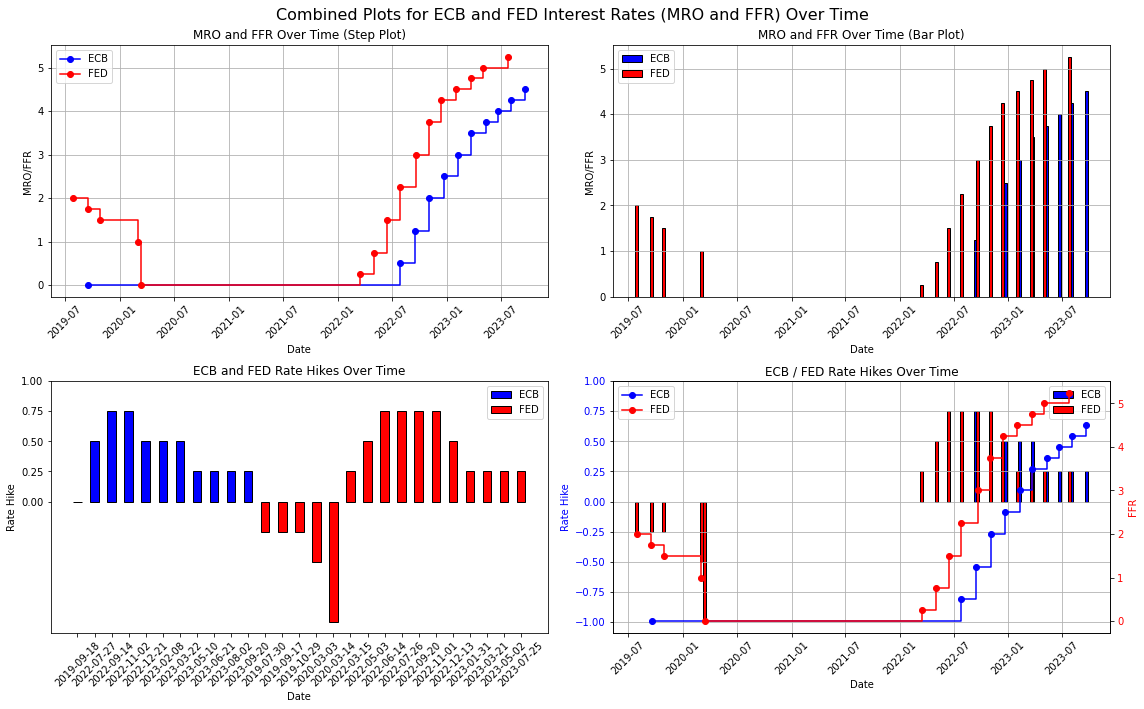

In [309]:
import matplotlib.pyplot as plt

# Assuming df_ecb_interest_rates and df_fed_interest_rates are your DataFrames

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plotting ECB data
axs[0, 0].step(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], where='post', marker='o', color='b')
axs[0, 0].step(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], where='post', marker='o', color='r')
axs[0, 0].set_title('MRO and FFR Over Time (Step Plot)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('MRO/FFR')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].legend(['ECB', 'FED'])
axs[0, 0].grid(True)


axs[0, 1].bar(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], width=10, color='b', edgecolor='black')
axs[0, 1].bar(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], width=10, color='r', edgecolor='black')
axs[0, 1].set_title('MRO and FFR Over Time (Bar Plot)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('MRO/FFR')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(['ECB', 'FED'])
axs[0, 1].grid(True)

axs[1, 0].bar(df_ecb_interest_rates['Date'].astype(str), df_ecb_interest_rates['Rate Hike'], width=0.5, color='b', edgecolor='black')
axs[1, 0].bar(df_fed_interest_rates['Date'].astype(str), df_fed_interest_rates['Rate Hike'], width=0.5, color='r', edgecolor='black')
axs[1, 0].set_title('ECB and FED Rate Hikes Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Rate Hike')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend(['ECB', 'FED'])
axs[1, 0].set_yticks([0, 0.25, 0.5, 0.75, 1])

# Plotting Fed data
ax3 = axs[1, 1]
ax3.bar(df_ecb_interest_rates['Date'], df_ecb_interest_rates['Rate Hike'], width=10, color='b', edgecolor='black')
ax3.bar(df_fed_interest_rates['Date'], df_fed_interest_rates['Rate Hike'], width=10, color='r', edgecolor='black')
ax3.set_xlabel('Date')
ax3.set_ylabel('Rate Hike', color='b')
ax3.set_title('ECB / FED Rate Hikes Over Time')
ax3.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='y', labelcolor='b')
ax3.set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax3.legend(['ECB', 'FED'])
ax3.grid(True)

# Create a twin Axes sharing the xaxis for Fed Interest Rate
ax4 = ax3.twinx()
ax4.set_ylabel('FFR', color='r')
ax4.step(df_ecb_interest_rates['Date'], df_ecb_interest_rates['MRO'], color='b', where='post', marker='o')
ax4.step(df_fed_interest_rates['Date'], df_fed_interest_rates['Interest Rate (FFR)'], color='r', where='post', marker='o')
ax4.legend(['ECB', 'FED'])
ax4.tick_params(axis='y', labelcolor='r')

fig.suptitle('Combined Plots for ECB and FED Interest Rates (MRO and FFR) Over Time', fontsize=16)


# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

## Load inflation data

#### US inflation data

In [310]:
url_us_inf = "https://www.usinflationcalculator.com/inflation/current-inflation-rates/"
page_us_inf = requests.get(url_us_inf)
response = requests.get(url_us_inf)

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table data
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df_us_inf = df.drop(0) # First row contains false entry; Alternative would be to only read in rows were all columns have values

In [311]:
df_us_inf.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
1,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1
2,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
3,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
4,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
5,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8


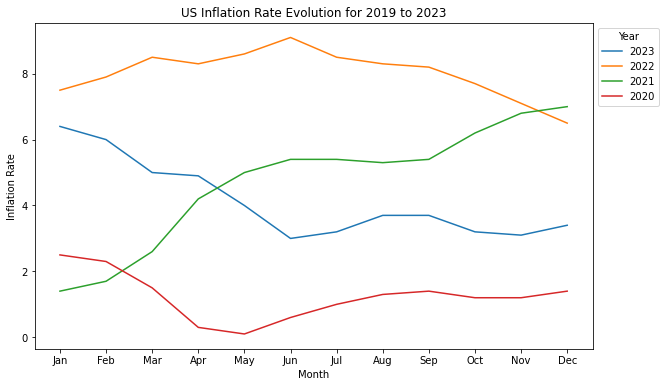

In [312]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(4)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

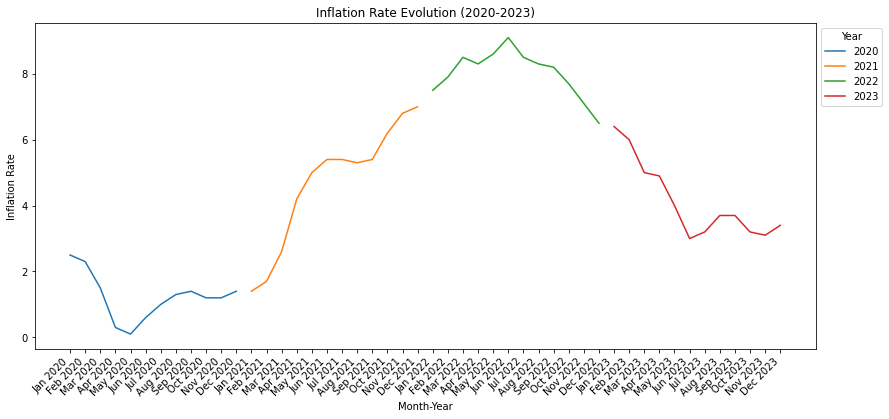

In [313]:
# Convert 'Year' column to integer
df_us_inf['Year'] = df_us_inf['Year'].astype(int)

# Remove Avg
df_us_inf = df_us_inf.drop('Ave', axis = 1)

# Reshape the DataFrame to a longer format
df_long = pd.melt(df_us_inf, id_vars='Year', var_name='Month', value_name='Inflation Rate')

# Filter data for the last 4 years (2020 to 2023)
df_long_last_4_years = df_long[df_long['Year'].between(2020, 2023)]

# Plot the evolution of inflation rates for the last 4 years
plt.figure(figsize=(14, 6))  # Adjust the figure size for better visibility

for year in sorted(df_long_last_4_years['Year'].unique(), reverse=False):
    df_subset = df_long_last_4_years[df_long_last_4_years['Year'] == year]
    plt.plot(df_subset['Month'] + ' ' + df_subset['Year'].astype(str), df_subset['Inflation Rate'].astype(float), label=str(year))

plt.title('Inflation Rate Evolution (2020-2023)')
plt.xlabel('Month-Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

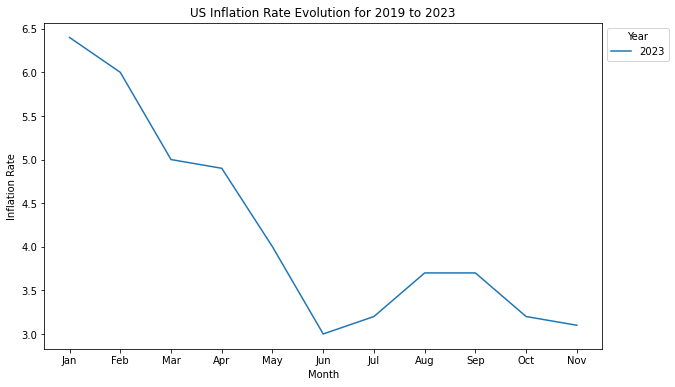

In [314]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(1)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [315]:
df_us_inf_transposed = df_us_inf.transpose()
df_us_inf_transposed.drop(df_us_inf_transposed.tail(0).index,inplace=True) # drop last n rows
df_us_inf_transposed

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Year,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Jan,6.4,7.5,1.4,2.5,1.6,2.1,2.5,1.4,-0.1,1.6,...,0,4.3,2.1,4.0,3.0,1.9,2.6,1.1,3.7,2.7
Feb,6.0,7.9,1.7,2.3,1.5,2.2,2.7,1.0,0.0,1.1,...,0.2,4.0,2.4,3.6,3.0,1.7,3.0,1.1,3.5,3.2
Mar,5.0,8.5,2.6,1.5,1.9,2.4,2.4,0.9,-0.1,1.5,...,-0.4,4.0,2.8,3.4,3.1,1.7,3.0,1.5,2.9,3.8
Apr,4.9,8.3,4.2,0.3,2.0,2.5,2.2,1.1,-0.2,2.0,...,-0.7,3.9,2.6,3.5,3.5,2.3,2.2,1.6,3.3,3.1
May,4.0,8.6,5.0,0.1,1.8,2.8,1.9,1.0,0.0,2.1,...,-1.3,4.2,2.7,4.2,2.8,3.1,2.1,1.2,3.6,3.2
Jun,3.0,9.1,5.4,0.6,1.6,2.9,1.6,1.0,0.1,2.1,...,-1.4,5.0,2.7,4.3,2.5,3.3,2.1,1.1,3.2,3.7
Jul,3.2,8.5,5.4,1.0,1.8,2.9,1.7,0.8,0.2,2.0,...,-2.1,5.6,2.4,4.1,3.2,3.0,2.1,1.5,2.7,3.7
Aug,3.7,8.3,5.3,1.3,1.7,2.7,1.9,1.1,0.2,1.7,...,-1.5,5.4,2.0,3.8,3.6,2.7,2.2,1.8,2.7,3.4
Sep,3.7,8.2,5.4,1.4,1.7,2.3,2.2,1.5,0.0,1.7,...,-1.3,4.9,2.8,2.1,4.7,2.5,2.3,1.5,2.6,3.5


In [339]:
# Transpose df and add dates to it to prepare the plotting
df_us_inf_transposed = df_us_inf.transpose()
df_us_inf_transposed.drop(df_us_inf_transposed.tail(0).index,inplace=True) # drop last n rows
new_header = df_us_inf_transposed.iloc[0] #grab the first row for the header
df_us_inf_transposed = df_us_inf_transposed[1:] #take the data less the header row
df_us_inf_transposed.columns = new_header #set the header row as the df header
melted_df = pd.melt(df_us_inf_transposed, var_name='Year', value_name='InflationRate', ignore_index=False)
melted_df['Month'] = melted_df.index
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
melted_df['MonthNumber'] = melted_df['Month'].map(month_mapping)
melted_df['Date'] = pd.to_datetime(melted_df['MonthNumber'].astype(str) + '-28-' + melted_df['Year'].astype(str), format='%m-%d-%Y')
df_us_inf_transposed = melted_df.drop(['MonthNumber', 'Month', 'Year'], axis=1)
df_us_inf_transposed.head(12)

,InflationRate,Date
Jan,6.4,2023-01-28
Feb,6.0,2023-02-28
Mar,5.0,2023-03-28
Apr,4.9,2023-04-28
May,4.0,2023-05-28
Jun,3.0,2023-06-28
Jul,3.2,2023-07-28
Aug,3.7,2023-08-28
Sep,3.7,2023-09-28
Oct,3.2,2023-10-28


/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_23348/2468475834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_inf_2020['InflationRate'] = df_us_inf_2020['InflationRate'].astype(float)


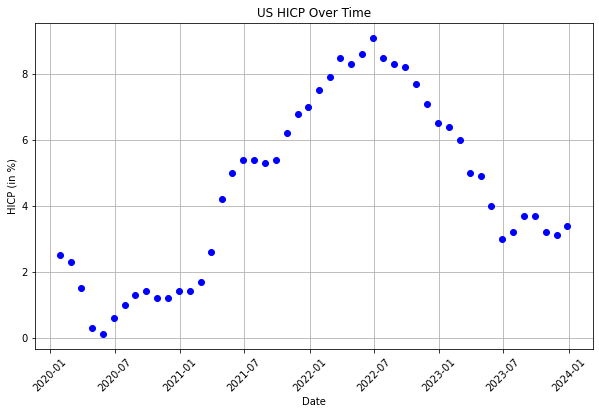

In [340]:
# Plotting
df_us_inf_2020 = df_us_inf_transposed[df_us_inf_transposed['Date'] >= '2020-01-01']
df_us_inf_2020['InflationRate'] = df_us_inf_2020['InflationRate'].astype(float)


plt.figure(figsize=(10, 6))
plt.plot(df_us_inf_2020['Date'], df_us_inf_2020['InflationRate'], marker='o', linestyle='', color='b')
plt.title('US HICP Over Time')
plt.xlabel('Date')
plt.ylabel('HICP (in %)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### EU inflation data

The ECB publishes its Inflation data here: https://data.ecb.europa.eu/data/datasets/ICP/ICP.M.U2.N.000000.4.ANR
This data is for the Euro area.

In [341]:
os.getcwd()

'/Users/tgumpp/DataspellProjects/ICBIRDIRM'

In [342]:
df_eu_inf = pd.read_csv('./Documents/ECB/ECB Data Portal_20240129125248.csv')
df_eu_inf['DATE'] = pd.to_datetime(df_eu_inf['DATE'])
df_eu_inf = df_eu_inf.rename(columns={'HICP - Overall index (ICP.M.U2.N.000000.4.ANR)': 'HICP / Inflation rate',})
df_eu_inf.tail()

,DATE,TIME PERIOD,HICP / Inflation rate
319,2023-08-31,2023Aug,5.2
320,2023-09-30,2023Sep,4.3
321,2023-10-31,2023Oct,2.9
322,2023-11-30,2023Nov,2.4
323,2023-12-31,2023Dec,2.9


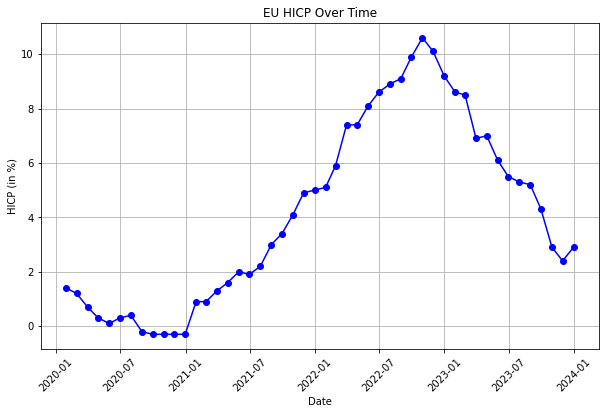

In [343]:
# Filter data for dates from Jan 2020 onwards
df_eu_inf_2020 = df_eu_inf[df_eu_inf['DATE'] >= '2020-01-01']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_eu_inf_2020['DATE'], df_eu_inf_2020['HICP / Inflation rate'], marker='o', linestyle='-', color='b')
plt.title('EU HICP Over Time')
plt.xlabel('Date')
plt.ylabel('HICP (in %)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

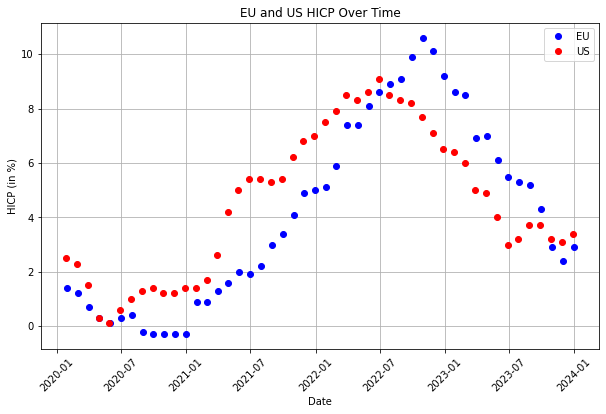

In [347]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_eu_inf_2020['DATE'], df_eu_inf_2020['HICP / Inflation rate'], marker='o', linestyle='', color='b')
plt.plot(df_us_inf_2020['Date'], df_us_inf_2020['InflationRate'], marker='o', linestyle='', color='r')
plt.title('EU and US HICP Over Time')
plt.xlabel('Date')
plt.ylabel('HICP (in %)')
plt.xticks(rotation=45)
plt.legend(['EU', 'US'])
plt.grid(True)
plt.show()

## Load market data
To compare inflation, the press statements and their sentiment to the stock market, we load in data of some ETFs replicating important indices. For this, we use the yfinance package.

#### S&P 500 ETF

In [31]:
import yfinance as yf

sp500 = yf.Ticker("IVV")
#sp500.info()

/Users/tgumpp/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [32]:
# get historical market data
sp500.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 00:00:00-05:00,474.399994,475.880005,472.700012,474.890015,5185100,0.0,0.0,0.0
2024-01-03 00:00:00-05:00,472.660004,473.410004,470.380005,471.010010,5996000,0.0,0.0,0.0
2024-01-04 00:00:00-05:00,470.510010,473.190002,469.269989,469.559998,6198300,0.0,0.0,0.0
2024-01-05 00:00:00-05:00,469.700012,472.660004,468.649994,470.119995,10429100,0.0,0.0,0.0
2024-01-08 00:00:00-05:00,470.619995,476.980011,470.549988,476.589996,8460200,0.0,0.0,0.0
2024-01-09 00:00:00-05:00,474.179993,477.170013,473.600006,476.140015,5361200,0.0,0.0,0.0
2024-01-10 00:00:00-05:00,476.390015,479.690002,476.140015,478.809998,5500300,0.0,0.0,0.0
2024-01-11 00:00:00-05:00,479.839996,480.350006,474.500000,478.549988,7450200,0.0,0.0,0.0
2024-01-12 00:00:00-05:00,480.149994,480.850006,477.500000,478.959991,3796900,0.0,0.0,0.0


[*********************100%%**********************]  1 of 1 completed


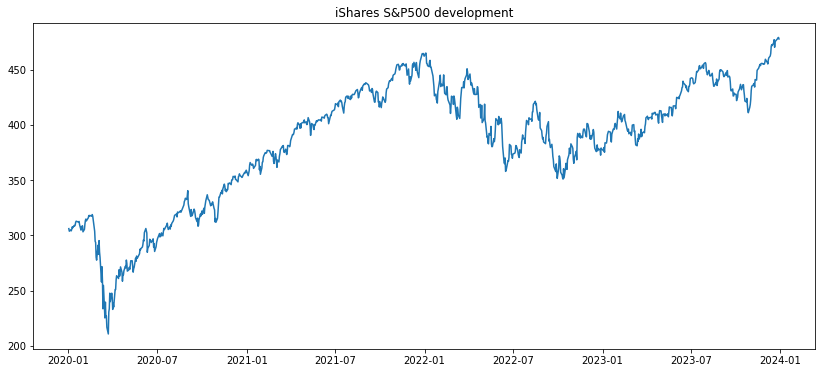

In [33]:
from datetime import date, timedelta

Start = date(2020, 1, 1)
Start.strftime('%Y-%m-%d')

End = date(2023, 12, 31)
End.strftime('%Y-%m-%d')

def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
                                     end=End)['Adj Close'])
    return Asset

SP500 = closing_price('IVV')

plt.figure(figsize=(14, 6))
plt.title('iShares S&P500 development')
plt.plot(SP500)
plt.show()

https://aroussi.com/post/python-yahoo-finance
python y finance

## First text analysis
We run various text analysis
- word count
- char count
- sophisticatedness
- n-grams
- etc.

In [ ]:
#nltk.download('vader_lexicon')
#nltk.download('stopwords')

Uncomment the cell above, if you get errors about missing downloads.

In [55]:
def get_word_count(text):
    word_count = len(text.split())
    #print(f"Word Count: {word_count}")
    return word_count

def get_char_count(text):
    char_count = len(text)
    # print(f"Character Count: {char_count}")
    return char_count

#### FOMC

In [56]:
df_fomc_press_statements = df_fomc_press_statements.assign(CharCount='')

In [57]:
for index, row in df_fomc_press_statements.iterrows():
    #text = row['Text'].astype(str)
    #print(type(row['Text']))
    #df_fomc_press_statements.at[index, 'WordCount'] = get_word_count(row['Text'])
    df_fomc_press_statements.at[index, 'CharCount'] = get_char_count(row['Text'])

In [58]:
df_fomc_press_statements

,Date,Filename,Text,Tokens,Word Count,CharCount,Sentence Count,Average Word Length,Longest Word,Shortest Word,...,2-grams,3-grams,4-grams,Most Common Words,Inflation Count,Interest Rate Count,Stopword Count,Punctuation Count,Unique Words Count,WordCount
0,2023-02-01 00:00:00,monetary20230201a,Recent indicators point to modest growth in s...,"[Recent, indicators, point, to, modest, growth...",396,2339,17,5.007576,mortgage-backed,.,...,"[(Recent, indicators), (indicators, point), (p...","[(Recent, indicators, point), (indicators, poi...","[(Recent, indicators, point, to), (indicators,...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,120,44,206,
1,2023-03-22 00:00:00,monetary20230322a,Recent indicators point to modest growth in s...,"[Recent, indicators, point, to, modest, growth...",431,2541,20,4.995360,mortgage-backed,.,...,"[(Recent, indicators), (indicators, point), (p...","[(Recent, indicators, point), (indicators, poi...","[(Recent, indicators, point, to), (indicators,...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,133,48,214,
2,2023-05-03 00:00:00,monetary20230503a,Economic activity expanded at a modest pace i...,"[Economic, activity, expanded, at, a, modest, ...",396,2328,19,4.984848,mortgage-backed,a,...,"[(Economic, activity), (activity, expanded), (...","[(Economic, activity, expanded), (activity, ex...","[(Economic, activity, expanded, at), (activity...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,117,47,201,
3,2023-06-14 00:00:00,monetary20230614a,Recent indicators suggest that economic activ...,"[Recent, indicators, suggest, that, economic, ...",406,2396,19,5.004926,mortgage-backed,a,...,"[(Recent, indicators), (indicators, suggest), ...","[(Recent, indicators, suggest), (indicators, s...","[(Recent, indicators, suggest, that), (indicat...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,121,47,206,
4,2023-07-26 00:00:00,monetary20230726a,Recent indicators suggest that economic activ...,"[Recent, indicators, suggest, that, economic, ...",398,2353,19,5.017588,mortgage-backed,a,...,"[(Recent, indicators), (indicators, suggest), ...","[(Recent, indicators, suggest), (indicators, s...","[(Recent, indicators, suggest, that), (indicat...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,119,47,200,
5,2023-09-20 00:00:00,monetary20230920a,Recent indicators suggest that economic activ...,"[Recent, indicators, suggest, that, economic, ...",404,2390,19,5.022277,mortgage-backed,a,...,"[(Recent, indicators), (indicators, suggest), ...","[(Recent, indicators, suggest), (indicators, s...","[(Recent, indicators, suggest, that), (indicat...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,119,48,205,
6,2023-11-01 00:00:00,monetary20231101a,Recent indicators suggest that economic activ...,"[Recent, indicators, suggest, that, economic, ...",410,2426,19,5.021951,mortgage-backed,a,...,"[(Recent, indicators), (indicators, suggest), ...","[(Recent, indicators, suggest), (indicators, s...","[(Recent, indicators, suggest, that), (indicat...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,121,48,206,
7,2023-12-13 00:00:00,monetary20231213a,Recent indicators suggest that growth of econ...,"[Recent, indicators, suggest, that, growth, of...",421,2480,19,4.992874,mortgage-backed,.,...,"[(Recent, indicators), (indicators, suggest), ...","[(Recent, indicators, suggest), (indicators, s...","[(Recent, indicators, suggest, that), (indicat...","[the, and, ,, ., to, of, ;, Committee, The, in...",1,3,128,48,211,
8,2022-01-26 00:00:00,monetary20220126a,Indicators of economic activity and employmen...,"[Indicators, of, economic, activity, and, empl...",484,2817,20,4.907025,mortgageâbacked,.,...,"[(Indicators, of), (of, economic), (economic, ...","[(Indicators, of, economic), (of, economic, ac...","[(Indicators, of, economic, activity), (of, ec...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,4,165,45,228,
9,2022-03-16 00:00:00,monetary20220316a,Indicators of economic activity 

In [350]:
import pandas as pd
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter
import string

# Assuming your DataFrame is named df_fomc_press_statements
# Replace 'Text' with your actual column name if it's different.
def generate_text_analysis(df_fomc_press_statements):

    # Load NLTK stopwords
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    df_fomc_press_statements['Tokens'] = df_fomc_press_statements['Text'].apply(word_tokenize)

    # Calculate the number of words and chars in each text
    df_fomc_press_statements['Word Count'] = df_fomc_press_statements['Tokens'].apply(len)
    #df_fomc_press_statements.at[index, 'CharCount'] = get_char_count(row['Tokens'])

    # Calculate the number of sentences in each text
    df_fomc_press_statements['Sentence Count'] = df_fomc_press_statements['Text'].apply(sent_tokenize).apply(len)

    # Calculate the average word length in each text
    df_fomc_press_statements['Average Word Length'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: sum(len(word) for word in tokens) / len(tokens) if len(tokens) > 0 else 0
    )

    # Find the longest and shortest words in each text
    df_fomc_press_statements['Longest Word'] = df_fomc_press_statements['Tokens'].apply(lambda tokens: max(tokens, key=len))
    df_fomc_press_statements['Shortest Word'] = df_fomc_press_statements['Tokens'].apply(lambda tokens: min(tokens, key=len))

    # Find the longest and shortest sentences in each text
    df_fomc_press_statements['Longest Sentence'] = df_fomc_press_statements['Text'].apply(
        sent_tokenize).apply(lambda sentences: max(sentences, key=len))
    df_fomc_press_statements['Shortest Sentence'] = df_fomc_press_statements['Text'].apply(
        sent_tokenize).apply(lambda sentences: min(sentences, key=len))

    # Find the n-grams (2, 3, 4 grams)
    for n in [2, 3, 4]:
        df_fomc_press_statements[f'{n}-grams'] = df_fomc_press_statements['Tokens'].apply(lambda tokens: list(ngrams(tokens, n)))

    # Find the most common words
    all_words = [word for tokens in df_fomc_press_statements['Tokens'] for word in tokens]
    word_freq = Counter(all_words)
    df_fomc_press_statements['Most Common Words'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: [word for word, _ in word_freq.most_common(10)])

    # Count the occurrences of specific words ('Inflation' and 'interest rate')
    df_fomc_press_statements['Inflation Count'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: tokens.count('Inflation'))
    df_fomc_press_statements['Interest Rate Count'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: tokens.count('interest') + tokens.count('rate'))

    # Count the occurrences of stopwords
    df_fomc_press_statements['Stopword Count'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: len([word for word in tokens if word.lower() in stop_words]))

    # Count the occurrences of punctuation
    df_fomc_press_statements['Punctuation Count'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: len([word for word in tokens if word in string.punctuation]))

    # Count the number of unique words
    df_fomc_press_statements['Unique Words Count'] = df_fomc_press_statements['Tokens'].apply(
        lambda tokens: len(set(tokens)))

    return df_fomc_press_statements

In [351]:
# Display the resulting DataFrame
df_fomc_press_statements = generate_text_analysis(df_fomc_press_statements)
df_fomc_press_statements

,Date,Filename,Text,Tokens,Word Count,CharCount,Sentence Count,Average Word Length,Longest Word,Shortest Word,...,2-grams,3-grams,4-grams,Most Common Words,Inflation Count,Interest Rate Count,Stopword Count,Punctuation Count,Unique Words Count,WordCount
24,2020-01-29 00:00:00,monetary20200129a,Information received since the Federal Open M...,"[Information, received, since, the, Federal, O...",357,2164,13,5.159664,Implementation,a,...,"[(Information, received), (received, since), (...","[(Information, received, since), (received, si...","[(Information, received, since, the), (receive...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,5,101,39,185,
25,2020-03-03 00:00:00,monetary20200303a,The fundamentals of the U.S. economy remain s...,"[The, fundamentals, of, the, U.S., economy, re...",157,869,7,4.649682,Implementation,.,...,"[(The, fundamentals), (fundamentals, of), (of,...","[(The, fundamentals, of), (fundamentals, of, t...","[(The, fundamentals, of, the), (fundamentals, ...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,39,22,109,
26,2020-03-15 00:00:00,monetary20200315a,The coronavirus outbreak has harmed communiti...,"[The, coronavirus, outbreak, has, harmed, comm...",768,4654,28,5.141927,mortgage-backed,",",...,"[(The, coronavirus), (coronavirus, outbreak), ...","[(The, coronavirus, outbreak), (coronavirus, o...","[(The, coronavirus, outbreak, has), (coronavir...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,4,251,68,323,
27,2020-03-23 00:00:00,monetary20200323a,The Federal Reserve is committed to use its f...,"[The, Federal, Reserve, is, committed, to, use...",646,4019,20,5.300310,per-counterparty,.,...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,2,200,51,260,
28,2020-04-29 00:00:00,monetary20200429a,The Federal Reserve is committed to using its...,"[The, Federal, Reserve, is, committed, to, usi...",470,2867,16,5.174468,mortgage-backed,",",...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,150,42,230,
29,2020-06-10 00:00:00,monetary20200610a,The Federal Reserve is committed to using its...,"[The, Federal, Reserve, is, committed, to, usi...",474,2869,16,5.128692,mortgage-backed,",",...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,151,43,234,
30,2020-07-29 00:00:00,monetary20200729a,The Federal Reserve is committed to using its...,"[The, Federal, Reserve, is, committed, to, usi...",497,3003,17,5.118712,mortgage-backed,",",...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,162,45,242,
31,2020-09-16 00:00:00,monetary20200916a,The Federal Reserve is committed to using its...,"[The, Federal, Reserve, is, committed, to, usi...",600,3597,18,5.060000,mortgage-backed,",",...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,3,208,44,255,
32,2020-11-05 00:00:00,monetary20201105a,The Federal Reserve is committed to using its...,"[The, Federal, Reserve, is, committed, to, usi...",515,3072,18,5.038835,mortgage-backed,",",...,"[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,2,170,42,241,
33,2020-12-16 00:00:00,monetary20201216a,The Federal Rese

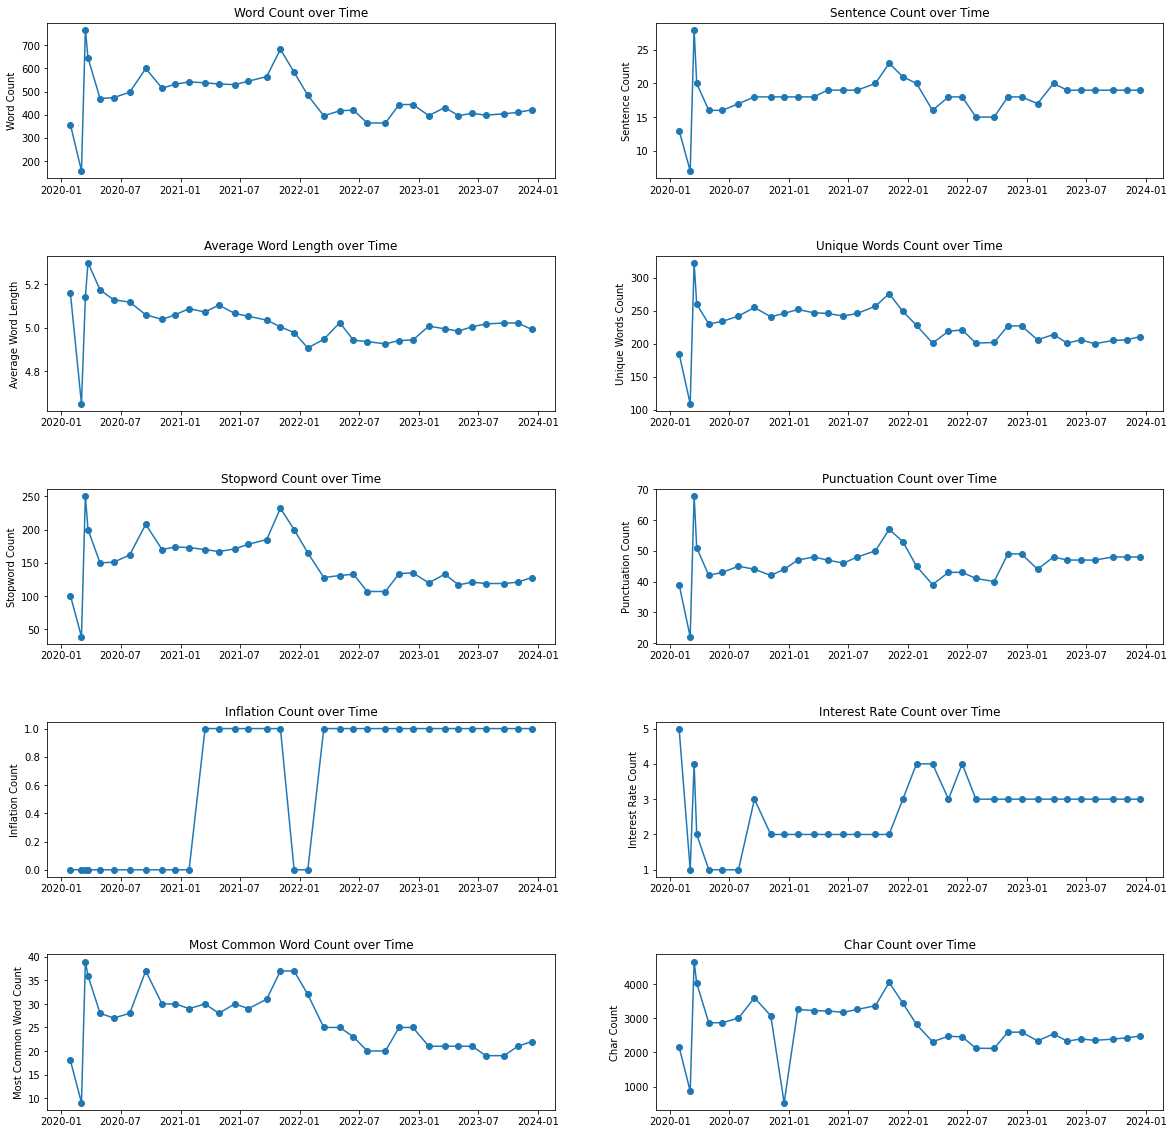

In [352]:
import matplotlib.pyplot as plt

# Assuming 'Date' is the name of your date column
# Replace it with your actual column name if it's different.

# Sort the DataFrame by date in ascending order
df_fomc_press_statements = df_fomc_press_statements.sort_values(by='Date')

# Create subplots with multiple plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# Plot Word Count over time
axs[0, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Word Count'], marker='o')
axs[0, 0].set_title('Word Count over Time')
axs[0, 0].set_ylabel('Word Count')

# Plot Sentence Count over time
axs[0, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Sentence Count'], marker='o')
axs[0, 1].set_title('Sentence Count over Time')
axs[0, 1].set_ylabel('Sentence Count')

# Plot Average Word Length over time
axs[1, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Average Word Length'], marker='o')
axs[1, 0].set_title('Average Word Length over Time')
axs[1, 0].set_ylabel('Average Word Length')

# Plot Unique Words Count over time
axs[1, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Unique Words Count'], marker='o')
axs[1, 1].set_title('Unique Words Count over Time')
axs[1, 1].set_ylabel('Unique Words Count')

# Plot Stopword Count over time
axs[2, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Stopword Count'], marker='o')
axs[2, 0].set_title('Stopword Count over Time')
axs[2, 0].set_ylabel('Stopword Count')

# Plot Punctuation Count over time
axs[2, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Punctuation Count'], marker='o')
axs[2, 1].set_title('Punctuation Count over Time')
axs[2, 1].set_ylabel('Punctuation Count')

# Plot Inflation Count over time
axs[3, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Inflation Count'], marker='o')
axs[3, 0].set_title('Inflation Count over Time')
axs[3, 0].set_ylabel('Inflation Count')

# Plot Interest Rate Count over time
axs[3, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Interest Rate Count'], marker='o')
axs[3, 1].set_title('Interest Rate Count over Time')
axs[3, 1].set_ylabel('Interest Rate Count')

# Choose a specific word for 'Most Common Words' over time (e.g., the most common word)
most_common_word_over_time = [Counter(tokens).most_common(1)[0][1] if tokens else 0 for tokens in
                              df_fomc_press_statements['Tokens']]
axs[4, 0].plot(df_fomc_press_statements['Date'], most_common_word_over_time, marker='o')
axs[4, 0].set_title('Most Common Word Count over Time')
axs[4, 0].set_ylabel('Most Common Word Count')

# Plot Char Count over time
axs[4, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['CharCount'], marker='o')
axs[4, 1].set_title('Char Count over Time')
axs[4, 1].set_ylabel('Char Count')

# Adjust layout to prevent overlapping and increase vertical space
plt.subplots_adjust(hspace=0.5)

# Adjust layout to prevent overlapping
#plt.tight_layout()

# Show the plots
plt.show()

#### ECB

In [353]:
df_ecb_press_statements = generate_text_analysis(df_ecb_press_statements)
df_ecb_press_statements

,Date,Text,Tokens,Word Count,Sentence Count,Average Word Length,Longest Word,Shortest Word,Longest Sentence,Shortest Sentence,2-grams,3-grams,4-grams,Most Common Words,Inflation Count,Interest Rate Count,Stopword Count,Punctuation Count,Unique Words Count
0,2023-12-14,The Governing Council today decided to keep th...,"[The, Governing, Council, today, decided, to, ...",519,18,4.716763,transmission.The,.,"In particular, its interest rate decisions wil...",Eurosystem staff expect economic growth to rem...,"[(The, Governing), (Governing, Council), (Coun...","[(The, Governing, Council), (Governing, Counci...","[(The, Governing, Council, today), (Governing,...","[the, to, ,, of, ., and, in, Governing, Counci...",0,7,180,54,233
1,2023-10-26,The Governing Council today decided to keep th...,"[The, Governing, Council, today, decided, to, ...",256,11,5.105469,data-dependent,.,"In particular, the Governing Council’s interes...",This is increasingly dampening demand and ther...,"[(The, Governing), (Governing, Council), (Coun...","[(The, Governing, Council), (Governing, Counci...","[(The, Governing, Council, today), (Governing,...","[the, to, ,, of, ., and, in, Governing, Counci...",1,6,92,21,131
2,2023-09-14,Inflation continues to decline but is still ex...,"[Inflation, continues, to, decline, but, is, s...",438,16,4.771689,data-dependent,.,In order to reinforce progress towards its tar...,This is an upward revision for 2023 and 2024 a...,"[(Inflation, continues), (continues, to), (to,...","[(Inflation, continues, to), (continues, to, d...","[(Inflation, continues, to, decline), (continu...","[the, to, ,, of, ., and, in, Governing, Counci...",1,8,155,42,184
3,2023-07-27,Inflation continues to decline but is still ex...,"[Inflation, continues, to, decline, but, is, s...",370,11,5.035135,transmission.The,.,The past rate increases continue to be transmi...,"While some measures show signs of easing, unde...","[(Inflation, continues), (continues, to), (to,...","[(Inflation, continues, to), (continues, to, d...","[(Inflation, continues, to, decline), (continu...","[the, to, ,, of, ., and, in, Governing, Counci...",1,9,146,23,179
4,2023-06-15,Inflation has been coming down but is projecte...,"[Inflation, has, been, coming, down, but, is, ...",425,14,4.785882,transmission.The,.,"In particular, its interest rate decisions wil...",Borrowing costs have increased steeply and gro...,"[(Inflation, has), (has, been), (been, coming)...","[(Inflation, has, been), (has, been, coming), ...","[(Inflation, has, been, coming), (has, been, c...","[the, to, ,, of, ., and, in, Governing, Counci...",1,6,161,39,202
5,2023-05-04,The inflation outlook continues to be too high...,"[The, inflation, outlook, continues, to, be, t...",293,10,4.979522,data-dependent,.,"At the same time, the past rate increases are ...",The inflation outlook continues to be too high...,"[(The, inflation), (inflation, outlook), (outl...","[(The, inflation, outlook), (inflation, outloo...","[(The, inflation, outlook, continues), (inflat...","[the, to, ,, of, ., and, in, Governing, Counci...",0,4,108,23,146
6,2023-03-16,Inflation is projected to remain too high for ...,"[Inflation, is, projected, to, remain, too, hi...",461,14,4.718004,transmission.The,.,The elevated level of uncertainty reinforces t...,Inflation is projected to remain too high for ...,"[(Inflation, is), (is, projected), (projected,...","[(Inflation, is, projected), (is, projected, t...","[(Inflation, is, projected, to), (is, projecte...","[the, to, ,, of, ., and, in, Governing, Counci...",2,2,172,44,215
7,2023-02-02,The Governing Council will stay the course in ...,"[The, Governing, Council, will, stay, the, cou...",376,11,4.984043,meeting-by-meeting,a,Without prejudice to the ECB’s price stability...,Partial reinvestments will be conducted broadl...,"[(The, Governing), (Governing, Council), (Coun...","[(The, Governing, Council), (Governing, Counci...","[(The, Governing, Council, will), (Governing, ...","[the, to, ,, of, ., a

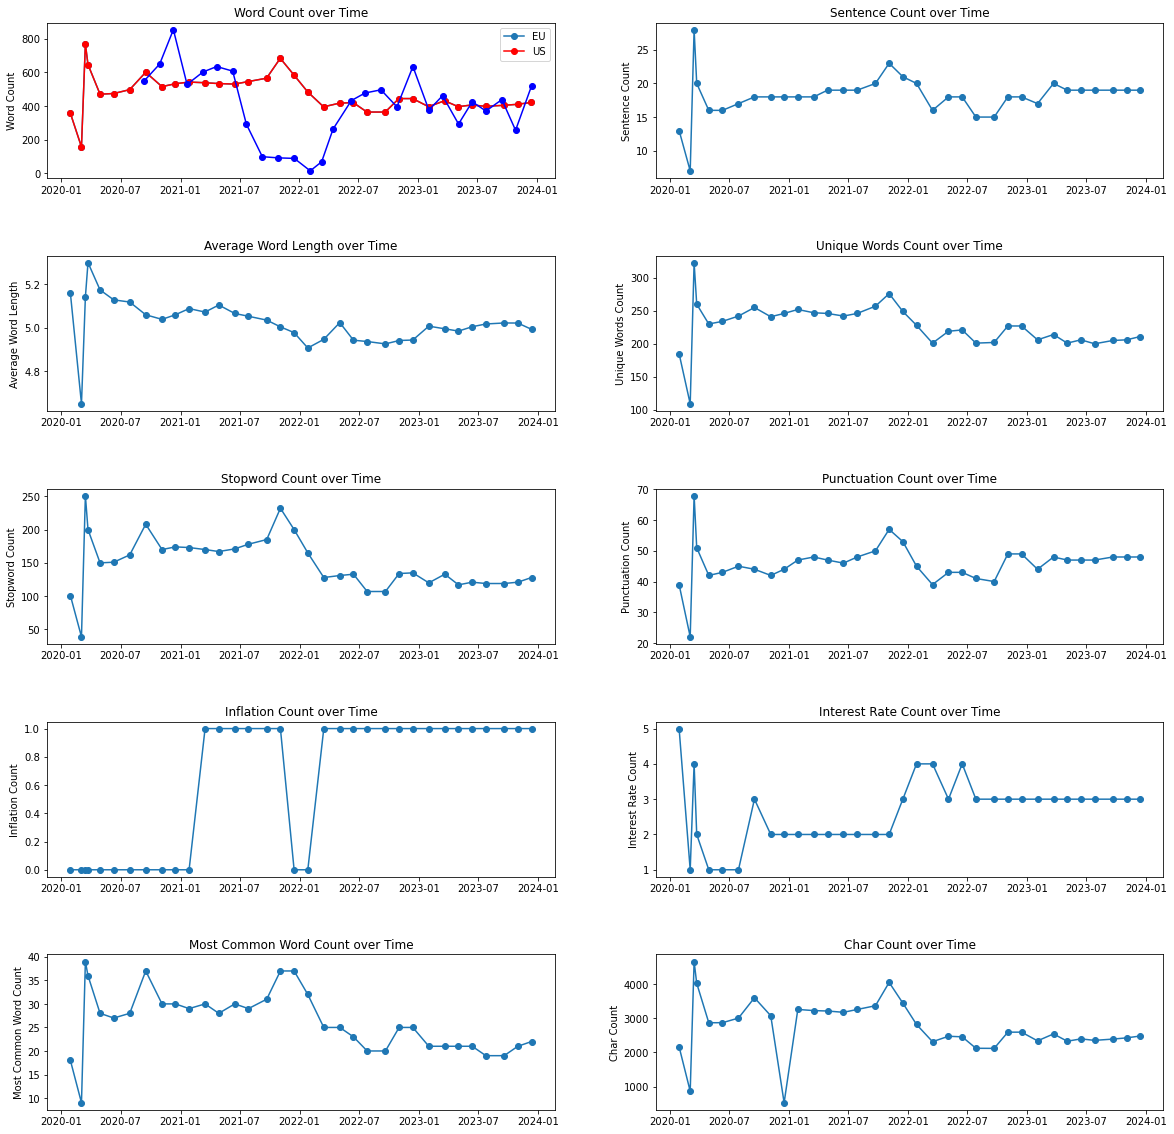

In [355]:
# Sort the DataFrame by date in ascending order
df_fomc_press_statements = df_fomc_press_statements.sort_values(by='Date')
df_ecb_press_statements = df_ecb_press_statements.sort_values(by='Date')

# Create subplots with multiple plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# Plot Word Count over time
# Old
axs[0, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Word Count'], marker='o')
axs[0, 0].set_title('Word Count over Time')
axs[0, 0].set_ylabel('Word Count')
#New
axs[0, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Word Count'], marker='o', color='r')
axs[0, 0].plot(df_ecb_press_statements['Date'], df_ecb_press_statements['Word Count'], marker='o', color='b')
axs[0, 0].set_title('Word Count over Time')
axs[0, 0].set_ylabel('Word Count')
axs[0, 0].legend(['EU', 'US'])

# Plot Sentence Count over time
axs[0, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Sentence Count'], marker='o')
axs[0, 1].set_title('Sentence Count over Time')
axs[0, 1].set_ylabel('Sentence Count')

# Plot Average Word Length over time
axs[1, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Average Word Length'], marker='o')
axs[1, 0].set_title('Average Word Length over Time')
axs[1, 0].set_ylabel('Average Word Length')

# Plot Unique Words Count over time
axs[1, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Unique Words Count'], marker='o')
axs[1, 1].set_title('Unique Words Count over Time')
axs[1, 1].set_ylabel('Unique Words Count')

# Plot Stopword Count over time
axs[2, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Stopword Count'], marker='o')
axs[2, 0].set_title('Stopword Count over Time')
axs[2, 0].set_ylabel('Stopword Count')

# Plot Punctuation Count over time
axs[2, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Punctuation Count'], marker='o')
axs[2, 1].set_title('Punctuation Count over Time')
axs[2, 1].set_ylabel('Punctuation Count')

# Plot Inflation Count over time
axs[3, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Inflation Count'], marker='o')
axs[3, 0].set_title('Inflation Count over Time')
axs[3, 0].set_ylabel('Inflation Count')

# Plot Interest Rate Count over time
axs[3, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['Interest Rate Count'], marker='o')
axs[3, 1].set_title('Interest Rate Count over Time')
axs[3, 1].set_ylabel('Interest Rate Count')

# Choose a specific word for 'Most Common Words' over time (e.g., the most common word)
most_common_word_over_time = [Counter(tokens).most_common(1)[0][1] if tokens else 0 for tokens in
                              df_fomc_press_statements['Tokens']]
axs[4, 0].plot(df_fomc_press_statements['Date'], most_common_word_over_time, marker='o')
axs[4, 0].set_title('Most Common Word Count over Time')
axs[4, 0].set_ylabel('Most Common Word Count')

# Plot Char Count over time
axs[4, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['CharCount'], marker='o')
axs[4, 1].set_title('Char Count over Time')
axs[4, 1].set_ylabel('Char Count')

# Adjust layout to prevent overlapping and increase vertical space
plt.subplots_adjust(hspace=0.5)

# Adjust layout to prevent overlapping
#plt.tight_layout()

# Show the plots
plt.show()

## Sentiment Analysis

In [31]:
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [32]:
for x in df_fomc_press_statements['Text']:
    #print(type(x))
    #print(type(sia.polarity_scores(x)))
    print(sia.polarity_scores(x))

{'neg': 0.078, 'neu': 0.846, 'pos': 0.076, 'compound': -0.5994}
{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'compound': 0.765}
{'neg': 0.051, 'neu': 0.881, 'pos': 0.068, 'compound': 0.6124}
{'neg': 0.05, 'neu': 0.879, 'pos': 0.072, 'compound': 0.743}
{'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'compound': 0.6124}
{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'compound': 0.775}
{'neg': 0.061, 'neu': 0.853, 'pos': 0.086, 'compound': 0.8225}
{'neg': 0.059, 'neu': 0.847, 'pos': 0.094, 'compound': 0.9042}
{'neg': 0.04, 'neu': 0.82, 'pos': 0.14, 'compound': 0.9934}
{'neg': 0.053, 'neu': 0.874, 'pos': 0.074, 'compound': 0.8382}
{'neg': 0.063, 'neu': 0.87, 'pos': 0.067, 'compound': 0.3415}
{'neg': 0.062, 'neu': 0.877, 'pos': 0.061, 'compound': -0.1531}
{'neg': 0.087, 'neu': 0.844, 'pos': 0.069, 'compound': -0.7906}
{'neg': 0.086, 'neu': 0.837, 'pos': 0.077, 'compound': -0.6597}
{'neg': 0.078, 'neu': 0.854, 'pos': 0.069, 'compound': -0.6808}
{'neg': 0.078, 'neu': 0.859, 'pos': 0.064, 'compound': -0.

In [50]:
# Create columns for sentiment scores
df_fomc_press_statements['compound'] = 0.0
df_fomc_press_statements['neg'] = 0.0
df_fomc_press_statements['neu'] = 0.0
df_fomc_press_statements['pos'] = 0.0

# Iterate through rows and calculate sentiment scores
for index, row in df_fomc_press_statements.iterrows():
    text = row['Text']
    scores = sia.polarity_scores(text)

    # Update the corresponding row with sentiment scores
    df_fomc_press_statements.at[index, 'compound'] = scores['compound']
    df_fomc_press_statements.at[index, 'neg'] = scores['neg']
    df_fomc_press_statements.at[index, 'neu'] = scores['neu']
    df_fomc_press_statements.at[index, 'pos'] = scores['pos']

In [51]:
#df_fomc_press_statements = df_fomc_press_statements.head(8)
df_fomc_press_statements

,Text,Date,Filename,WordCount,CharCount,compound,neg,neu,pos,Tokens,...,Shortest Sentence,2-grams,3-grams,4-grams,Most Common Words,Inflation Count,Interest Rate Count,Stopword Count,Punctuation Count,Unique Words Count
24,Information received since the Federal Open M...,2020-01-29 00:00:00,monetary20200129a,317,2164,0.2023,0.045,0.909,0.047,"[Information, received, since, the, Federal, O...",...,"Implementation Note issued January 29, 2020","[(Information, received), (received, since), (...","[(Information, received, since), (received, si...","[(Information, received, since, the), (receive...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,5,101,39,185
25,The fundamentals of the U.S. economy remain s...,2020-03-03 00:00:00,monetary20200303a,135,869,0.5106,0.045,0.894,0.061,"[The, fundamentals, of, the, U.S., economy, re...",...,"For media inquiries, call 202-452-2955.","[(The, fundamentals), (fundamentals, of), (of,...","[(The, fundamentals, of), (fundamentals, of, t...","[(The, fundamentals, of, the), (fundamentals, ...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,39,22,109
26,The coronavirus outbreak has harmed communiti...,2020-03-15 00:00:00,monetary20200315a,697,4654,0.9913,0.026,0.870,0.104,"[The, coronavirus, outbreak, has, harmed, comm...",...,"For media inquiries, call 202-452-2955.","[(The, coronavirus), (coronavirus, outbreak), ...","[(The, coronavirus, outbreak), (coronavirus, o...","[(The, coronavirus, outbreak, has), (coronavir...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,4,251,68,323
27,The Federal Reserve is committed to use its f...,2020-03-23 00:00:00,monetary20200323a,588,4019,0.9978,0.010,0.826,0.164,"[The, Federal, Reserve, is, committed, to, use...",...,"For media inquiries, call 202-452-2955.","[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,2,200,51,260
28,The Federal Reserve is committed to using its...,2020-04-29 00:00:00,monetary20200429a,428,2867,0.9587,0.056,0.842,0.101,"[The, Federal, Reserve, is, committed, to, usi...",...,"Implementation Note issued April 29, 2020","[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,150,42,230
29,The Federal Reserve is committed to using its...,2020-06-10 00:00:00,monetary20200610a,431,2869,0.9787,0.047,0.841,0.112,"[The, Federal, Reserve, is, committed, to, usi...",...,"Implementation Note issued June 10, 2020","[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,151,43,234
30,The Federal Reserve is committed to using its...,2020-07-29 00:00:00,monetary20200729a,452,3003,0.9871,0.048,0.831,0.121,"[The, Federal, Reserve, is, committed, to, usi...",...,"Implementation Note issued July 29, 2020","[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,1,162,45,242
31,The Federal Reserve is committed to using its...,2020-09-16 00:00:00,monetary20200916a,553,3597,0.9868,0.040,0.855,0.105,"[The, Federal, Reserve, is, committed, to, usi...",...,"Implementation Note issued September 16, 2020","[(The, Federal), (Federal, Reserve), (Reserve,...","[(The, Federal, Reserve), (Federal, Reserve, i...","[(The, Federal, Reserve, is), (Federal, Reserv...","[the, and, ,, ., to, of, ;, Committee, The, in...",0,3,208,44,255
32,The Federal Reserve is committed to using its...,2020-11-05 00:00:00,monetary20201105a,470,3072,0.9639,0.042,0.867,0.092,"[The, Federal, Reserve, is, committed, to, usi...",...,"Implementation Note issued 

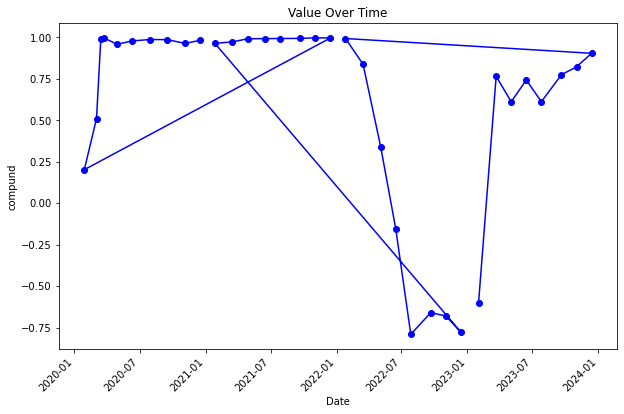

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df_fomc_press_statements['Date'], df_fomc_press_statements['compound'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('compund')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

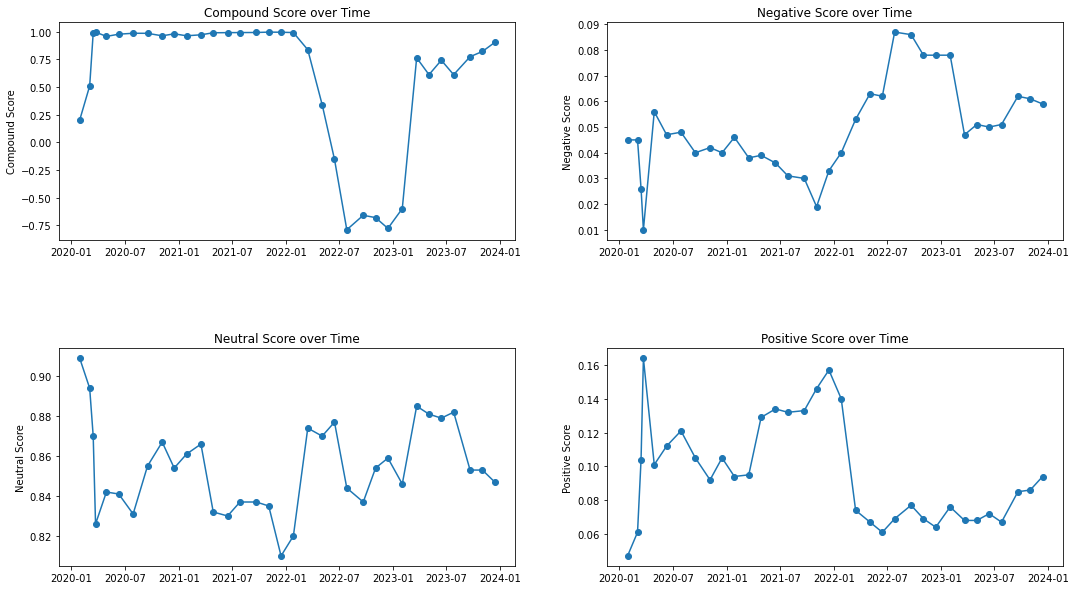

In [52]:
# Create subplots for sentiment analysis metrics
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Plot 'compound' over time
axs2[0, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['compound'], marker='o')
axs2[0, 0].set_title('Compound Score over Time')
axs2[0, 0].set_ylabel('Compound Score')

# Plot 'neg' over time
axs2[0, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['neg'], marker='o')
axs2[0, 1].set_title('Negative Score over Time')
axs2[0, 1].set_ylabel('Negative Score')

# Plot 'neu' over time
axs2[1, 0].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['neu'], marker='o')
axs2[1, 0].set_title('Neutral Score over Time')
axs2[1, 0].set_ylabel('Neutral Score')

# Plot 'pos' over time
axs2[1, 1].plot(df_fomc_press_statements['Date'], df_fomc_press_statements['pos'], marker='o')
axs2[1, 1].set_title('Positive Score over Time')
axs2[1, 1].set_ylabel('Positive Score')

# Adjust layout to prevent overlapping and increase vertical space
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.show()

#### Roberta
ToDo: Add additional models for sentiment analyis (Roberta, Loughran-McDonald Master Dictionary w/ Sentiment Word Lists) https://sraf.nd.edu/loughranmcdonald-master-dictionary/

In [37]:
# ToDo: Add additional models for sentiment analyis

#### Textblob

In [53]:
#pip install nltk textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
from textblob import TextBlob

# Assuming 'Text' is the name of your text column
# Replace it with your actual column name if it's different.

# Load or preprocess your DataFrame if needed
# df = ...

# Initialize sentiment analysis models
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_vader_sentiment(text):
    sentiment_scores = vader_analyzer.polarity_scores(text)
    return sentiment_scores['compound'], sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']

# Function to get sentiment scores using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis to the 'Text' column and add results to the DataFrame
df_fomc_press_statements['VADER_Compound'], df_fomc_press_statements['VADER_Neg'], df_fomc_press_statements['VADER_Neu'], df_fomc_press_statements['VADER_Pos'] = zip(*df_fomc_press_statements['Text'].apply(get_vader_sentiment).tolist())
df_fomc_press_statements['TextBlob_Polarity'], df_fomc_press_statements['TextBlob_Subjectivity'] = zip(*df_fomc_press_statements['Text'].apply(get_textblob_sentiment).tolist())

# Display the updated DataFrame with sentiment analysis results
print(df_fomc_press_statements.head())

                                                 Text                 Date  \
24   Information received since the Federal Open M...  2020-01-29 00:00:00   
25   The fundamentals of the U.S. economy remain s...  2020-03-03 00:00:00   
26   The coronavirus outbreak has harmed communiti...  2020-03-15 00:00:00   
27   The Federal Reserve is committed to use its f...  2020-03-23 00:00:00   
28   The Federal Reserve is committed to using its...  2020-04-29 00:00:00   

             Filename WordCount CharCount  compound    neg    neu    pos  \
24  monetary20200129a       317      2164    0.2023  0.045  0.909  0.047   
25  monetary20200303a       135       869    0.5106  0.045  0.894  0.061   
26  monetary20200315a       697      4654    0.9913  0.026  0.870  0.104   
27  monetary20200323a       588      4019    0.9978  0.010  0.826  0.164   
28  monetary20200429a       428      2867    0.9587  0.056  0.842  0.101   

                                               Tokens  ...  \
24  [Informa

In [56]:
df_fomc_press_statements

,Text,Date,Filename,WordCount,CharCount,compound,neg,neu,pos,Tokens,...,Interest Rate Count,Stopword Count,Punctuation Count,Unique Words Count,VADER_Compound,VADER_Neg,VADER_Neu,VADER_Pos,TextBlob_Polarity,TextBlob_Subjectivity
24,Information received since the Federal Open M...,2020-01-29 00:00:00,monetary20200129a,317,2164,0.2023,0.045,0.909,0.047,"[Information, received, since, the, Federal, O...",...,5,101,39,185,0.2023,0.045,0.909,0.047,0.061152,0.299755
25,The fundamentals of the U.S. economy remain s...,2020-03-03 00:00:00,monetary20200303a,135,869,0.5106,0.045,0.894,0.061,"[The, fundamentals, of, the, U.S., economy, re...",...,1,39,22,109,0.5106,0.045,0.894,0.061,0.261905,0.419048
26,The coronavirus outbreak has harmed communiti...,2020-03-15 00:00:00,monetary20200315a,697,4654,0.9913,0.026,0.870,0.104,"[The, coronavirus, outbreak, has, harmed, comm...",...,4,251,68,323,0.9913,0.026,0.870,0.104,0.133979,0.365141
27,The Federal Reserve is committed to use its f...,2020-03-23 00:00:00,monetary20200323a,588,4019,0.9978,0.010,0.826,0.164,"[The, Federal, Reserve, is, committed, to, use...",...,2,200,51,260,0.9978,0.010,0.826,0.164,0.141373,0.474163
28,The Federal Reserve is committed to using its...,2020-04-29 00:00:00,monetary20200429a,428,2867,0.9587,0.056,0.842,0.101,"[The, Federal, Reserve, is, committed, to, usi...",...,1,150,42,230,0.9587,0.056,0.842,0.101,0.144114,0.335648
29,The Federal Reserve is committed to using its...,2020-06-10 00:00:00,monetary20200610a,431,2869,0.9787,0.047,0.841,0.112,"[The, Federal, Reserve, is, committed, to, usi...",...,1,151,43,234,0.9787,0.047,0.841,0.112,0.123280,0.329101
30,The Federal Reserve is committed to using its...,2020-07-29 00:00:00,monetary20200729a,452,3003,0.9871,0.048,0.831,0.121,"[The, Federal, Reserve, is, committed, to, usi...",...,1,162,45,242,0.9871,0.048,0.831,0.121,0.120713,0.331099
31,The Federal Reserve is committed to using its...,2020-09-16 00:00:00,monetary20200916a,553,3597,0.9868,0.040,0.855,0.105,"[The, Federal, Reserve, is, committed, to, usi...",...,3,208,44,255,0.9868,0.040,0.855,0.105,0.158468,0.353723
32,The Federal Reserve is committed to using its...,2020-11-05 00:00:00,monetary20201105a,470,3072,0.9639,0.042,0.867,0.092,"[The, Federal, Reserve, is, committed, to, usi...",...,2,170,42,241,0.9639,0.042,0.867,0.092,0.138317,0.320507
33,The Federal Reserve is committed to using its...,2020-12-16 00:00:00,monetary20201216a,484,3183,0.9821,0.040,0.854,0.105,"[The, Federal, Reserve, is, committed, to, usi...",...,2,174,44,246,0.9821,0.040,0.854,0.105,0.129493,0.335212


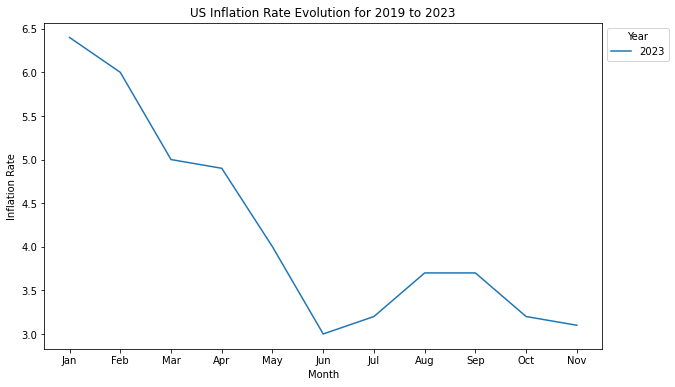

In [62]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(1)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Transform dataframe into a series with dates. We use the 15th of each month.

In [63]:
# Transpose df and add dates to it to prepare the plotting
df_us_inf_transposed = df_us_inf.transpose()
df_us_inf_transposed.drop(df_us_inf_transposed.tail(1).index,inplace=True) # drop last n rows
new_header = df_us_inf_transposed.iloc[0] #grab the first row for the header
df_us_inf_transposed = df_us_inf_transposed[1:] #take the data less the header row
df_us_inf_transposed.columns = new_header #set the header row as the df header
melted_df = pd.melt(df_us_inf_transposed, var_name='Year', value_name='InflationRate', ignore_index=False)
melted_df['Month'] = melted_df.index
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
melted_df['MonthNumber'] = melted_df['Month'].map(month_mapping)
melted_df['Date'] = pd.to_datetime(melted_df['MonthNumber'].astype(str) + '-15-' + melted_df['Year'].astype(str), format='%m-%d-%Y')
df_us_inf_transposed = melted_df.drop(['MonthNumber', 'Month', 'Year'], axis=1)
df_us_inf_transposed.head(12)

,InflationRate,Date
Jan,6.4,2023-01-15
Feb,6.0,2023-02-15
Mar,5.0,2023-03-15
Apr,4.9,2023-04-15
May,4.0,2023-05-15
Jun,3.0,2023-06-15
Jul,3.2,2023-07-15
Aug,3.7,2023-08-15
Sep,3.7,2023-09-15
Oct,3.2,2023-10-15


## Comparing sentiment analysis with inflation rate development

In [45]:
df_fomc_press_statements['Date'] = pd.to_datetime(df_fomc_press_statements['Date'], format='%d.%m.%Y')

In [64]:
print(type(df_fomc_press_statements['Date'][1]))
print(type(df_fomc_press_statements['Date_format'][1]))
print(type(df_us_inf_transposed['Date'][1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


KeyError: 'Date_format'

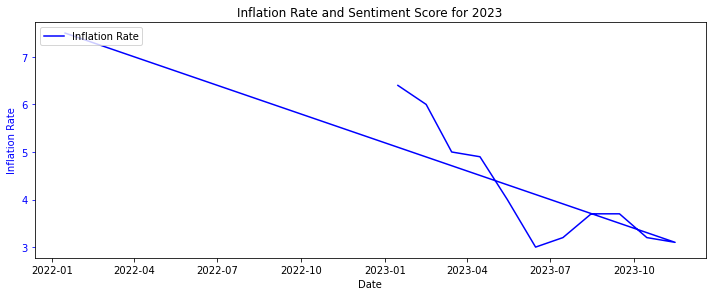

In [66]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the Inflation Rate on the first y-axis
ax1.plot(df_us_inf_transposed.head(12)['Date'], df_us_inf_transposed.head(12)['InflationRate'].astype(float), color='blue', label='Inflation Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for Sentiment Score
#ax2 = ax1.twinx()
#ax2.plot(df_fomc_press_statements['Date_format'], df_fomc_press_statements['compound'].astype(float), color='green', label='Sentiment Score')
#ax2.set_ylabel('Sentiment Score', color='green')
#ax2.tick_params('y', colors='green')

# Display the legend
fig.tight_layout()
plt.legend(loc='upper left')
plt.title('Inflation Rate and Sentiment Score for 2023')

# Show the plot
plt.show()

KeyError: 'VADER_Compound'

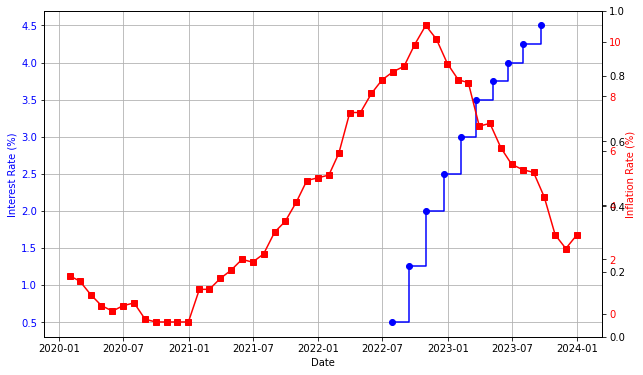

In [73]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

df_ecb_interest_rates = df_ecb_interest_rates[df_ecb_interest_rates['Date'] >= '2020-01-01']
df_eu_inf = df_eu_inf[df_eu_inf['DATE'] >= '2020-01-01']

# Plotting Interest Rate on the primary y-axis (ax1)
ax1.step(df['Date'], df['MRO'], where='post', marker='o', linestyle='-', color='b', label='Interest Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting Inflation Rate on the secondary y-axis (ax2)
ax2.plot(df_eu_inf['DATE'], df_eu_inf['HICP / Inflation rate'], marker='s', linestyle='-', color='r', label='Inflation Rate')
ax2.set_ylabel('Inflation Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Creating another secondary y-axis
ax3 = ax1.twinx()

# Plotting Sentiment Analysis (VADER_compound) on the third y-axis (ax3)
ax3.plot(df_fomc_press_statements['Date'], df_fomc_press_statements['VADER_Compound'], marker='^', linestyle='-', color='g', label='Sentiment Analysis')
ax3.set_ylabel('Sentiment Analysis (VADER_compound)', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

## Further Research

There are multiple other data sources we could look into.

- FOMC projection materials, released every second FOMC meeting
- Press conferences of ECB and FOMC
- Minutes of FOMC meetings

As investigating them would exceed the scope of this project, we focused on merely the press statements. However these documents would be exciting avenues to continue this investigation.